In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from env import user, password, host

### Acquire and summarize

In [2]:
def get_zillow_data(use_cache=True):
    '''This function returns the data from the zillow database in Codeup Data Science Database. 
    In my SQL query I have joined all necessary tables together, so that the resulting dataframe contains all the 
    information that is needed
    '''
    if os.path.exists('zillow.csv') and use_cache:
        print('Using cached csv')
        return pd.read_csv('zillow.csv')
    print('Acquiring data from SQL database')

    database_url_base = f'mysql+pymysql://{user}:{password}@{host}/'
    query = '''
    select * from properties_2017
    join predictions_2017 using(parcelid)
    left join airconditioningtype using(airconditioningtypeid)
    left join architecturalstyletype using(architecturalstyletypeid)
    left join buildingclasstype using(buildingclasstypeid)
    left join heatingorsystemtype using(heatingorsystemtypeid)
    left join propertylandusetype using(propertylandusetypeid)
    left join storytype using(storytypeid)
    left join typeconstructiontype using(typeconstructiontypeid)
    where latitude IS NOT NULL
    and longitude IS NOT NULL
     '''
    df = pd.read_sql(query, database_url_base + 'zillow')
    df.to_csv('zillow.csv', index=False)
    return df

In [3]:
df = get_zillow_data()

Using cached csv


/var/folders/dy/6l70n7994h596yst0fdjbly40000gn/T/ipykernel_50116/1979247754.py:1: DtypeWarning: Columns (64) have mixed types.Specify dtype option on import or set low_memory=False.
  df = get_zillow_data()


In [4]:
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,NaN,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,NaN,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,NaN,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,NaN,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,1970746,NaN,...,4,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [5]:
df.shape

(77580, 69)

### SUMMARIZE DATA
- summary stats, info, dtypes, shape, distributions, value_counts, etc.

In [6]:
df.describe()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id.1,logerror
count,223.000000,50.0,77580.000000,49572.000000,15.000000,207.000000,25007.000000,7.758000e+04,7.758000e+04,50.000000,...,172.0,7.746500e+04,7.757900e+04,77580.0,7.757800e+04,77575.000000,2900.000000,7.733300e+04,77580.000000,77580.000000
mean,6.040359,7.0,261.824465,3.921811,3.933333,7.386473,1.812013,1.300828e+07,1.495404e+06,679.720000,...,1.0,1.892796e+05,4.901476e+05,2016.0,3.011500e+05,5995.927626,14.088276,6.049667e+13,38806.723795,0.016800
std,0.556035,0.0,5.141564,3.594770,0.258199,2.728030,2.965768,3.519376e+06,8.609700e+05,689.703546,...,0.0,2.304095e+05,6.537942e+05,0.0,4.927219e+05,7628.816490,2.181281,1.533329e+12,22403.756329,0.170739
min,4.000000,7.0,31.000000,1.000000,3.000000,2.000000,1.000000,1.071186e+07,3.490000e+02,38.000000,...,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,0.000000,-4.655420
25%,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,1.153820e+07,7.521430e+05,273.000000,...,1.0,8.417100e+04,2.068990e+05,2016.0,8.529325e+04,2712.650000,14.000000,6.037311e+13,19404.750000,-0.024310
50%,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,1.253056e+07,1.498256e+06,515.000000,...,1.0,1.364020e+05,3.588780e+05,2016.0,2.031810e+05,4448.230000,15.000000,6.037603e+13,38804.500000,0.006675
75%,6.000000,7.0,266.000000,7.000000,4.000000,7.000000,1.000000,1.421135e+07,2.240950e+06,796.500000,...,1.0,2.187340e+05,5.690000e+05,2016.0,3.667398e+05,6926.885000,15.000000,6.059042e+13,58208.250000,0.039291
max,13.000000,7.0,275.000000,24.000000,4.000000,21.000000,13.000000,1.676893e+08,2.982274e+06,3560.000000,...,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,77613.000000,5.262999


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        223 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77580 non-null  float64
 3   heatingorsystemtypeid         49572 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      207 non-null    float64
 6   airconditioningtypeid         25007 non-null  float64
 7   parcelid                      77580 non-null  int64  
 8   id                            77580 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77580 non-null  float64
 11  bedroomcnt                    77580 non-null  float64
 12  buildingqualitytypeid         49810 non-null  float64
 13  c

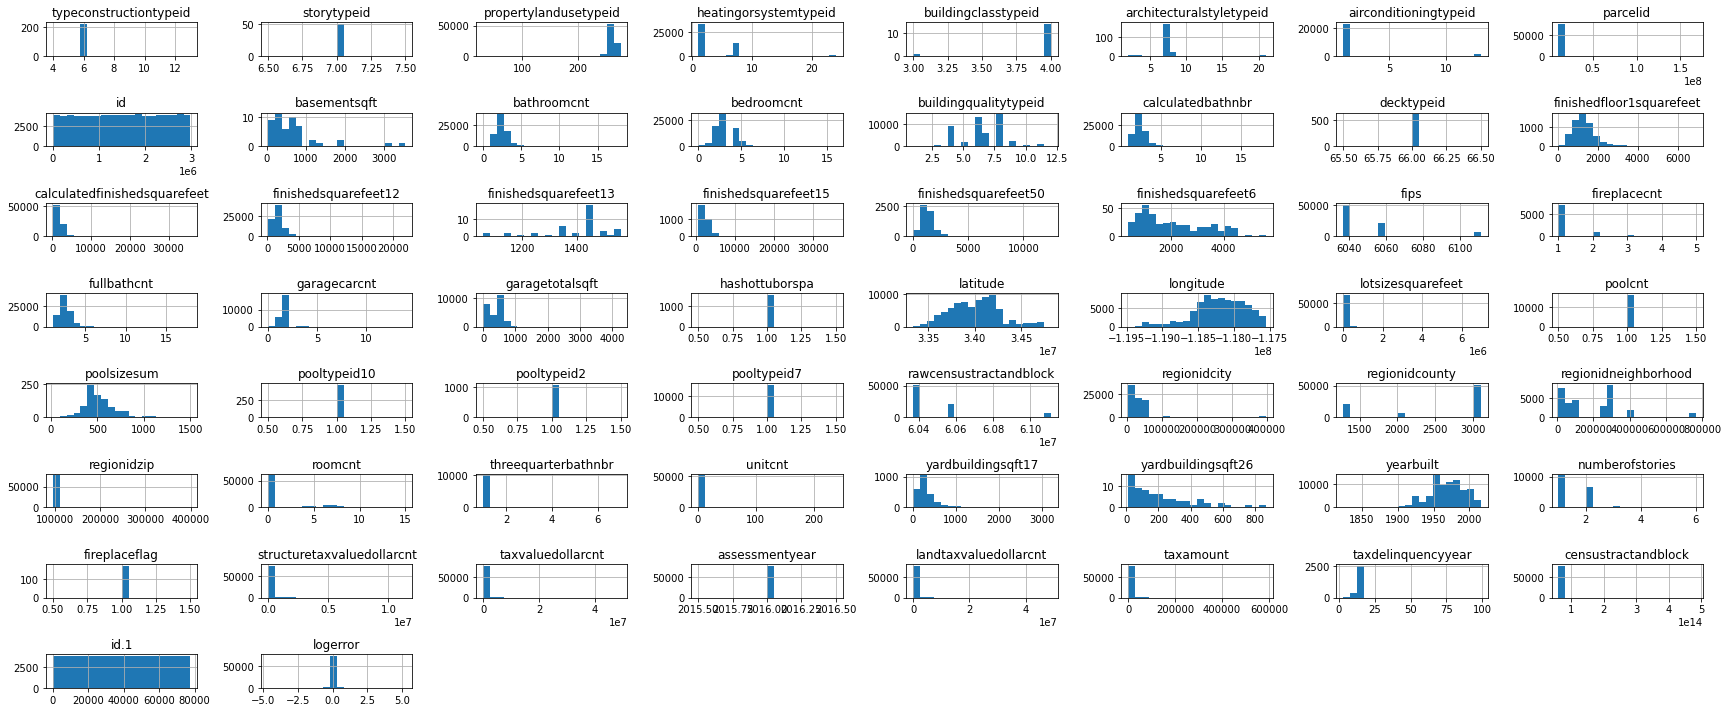

In [8]:
df.hist(figsize=(24, 10), bins=20)
plt.tight_layout()

In [9]:
# Get count of nulls values and sort them
nulls = df.isnull().sum().sort_values(ascending = False)

# where are most of the nulls
nulls.head(35)

buildingclassdesc           77565
buildingclasstypeid         77565
finishedsquarefeet13        77538
storydesc                   77530
basementsqft                77530
storytypeid                 77530
yardbuildingsqft26          77510
fireplaceflag               77408
architecturalstyletypeid    77373
architecturalstyledesc      77373
typeconstructiontypeid      77357
typeconstructiondesc        77357
finishedsquarefeet6         77194
pooltypeid10                77115
decktypeid                  76966
poolsizesum                 76711
pooltypeid2                 76506
hashottuborspa              76041
yardbuildingsqft17          75187
taxdelinquencyflag          74680
taxdelinquencyyear          74680
finishedsquarefeet15        74553
finishedsquarefeet50        71543
finishedfloor1squarefeet    71543
fireplacecnt                69291
threequarterbathnbr         67474
pooltypeid7                 62501
poolcnt                     61406
numberofstories             59981
airconditionin

In [10]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    percent_missing = num_missing / rows
    cols_missing = pd.DataFrame({'number_missing_rows':num_missing, 'percent_rows_missing': percent_missing})
    return cols_missing

In [11]:
nulls_by_columns = nulls_by_col(df)
nulls_by_columns.sort_values(by = 'percent_rows_missing', ascending = False, inplace = True)
nulls_by_columns.head(30)

,number_missing_rows,percent_rows_missing
buildingclassdesc,77565,0.999807
buildingclasstypeid,77565,0.999807
finishedsquarefeet13,77538,0.999459
storydesc,77530,0.999356
basementsqft,77530,0.999356
storytypeid,77530,0.999356
yardbuildingsqft26,77510,0.999098
fireplaceflag,77408,0.997783
architecturalstyletypeid,77373,0.997332
architecturalstyledesc,77373,0.997332


In [12]:
def nulls_by_row(df):
    num_cols_missing = df.isnull().sum(axis=1)
    pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100
    rows_missing = pd.DataFrame({'num_cols_missing':num_cols_missing, 'pct_cols_missing':pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing

null_rows = nulls_by_row(df)
null_rows.sort_values(by = 'pct_cols_missing', ascending = False, inplace = True)
null_rows.head(20)

,num_cols_missing,pct_cols_missing,num_rows
25,48,69.56521739130434,3
24,47,68.11594202898551,3
23,46,66.66666666666666,5
22,45,65.21739130434783,50
21,44,63.76811594202898,79
20,43,62.31884057971014,29
19,42,60.86956521739131,27
18,41,59.42028985507246,29
17,40,57.971014492753625,230
16,39,56.52173913043478,285


### Prepare data goals
- Defining single units?
- Remove properties that are likely something other than single unit
    - Do not purely filter by unitcnt
    - Goal is reducing single units that may be falsely removed as something else
- Ideas:
    - Keep:
    - 260, residential general
    - 261, single family residential
    - 262, rural residence
    - 279 inferred singel family residential

In [13]:
df.shape

(77580, 69)

In [14]:
# using .isin to isolate only the type id

df = df[df.propertylandusetypeid.isin([260, 261, 262, 279])]
df.shape

(52484, 69)

In [15]:
# set datafram to houses with at least 1 bed/bath each
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0)]
df.shape

(52300, 69)

In [16]:
# looking at the unit count column of df
df.unitcnt.value_counts()

1.0    33783
2.0       28
4.0        3
3.0        1
Name: unitcnt, dtype: int64

In [17]:
# a lot of empty values for unitcnt
df.unitcnt.isnull().sum()

18485

In [18]:
# filling null values with most popular
df.unitcnt = df.unitcnt.fillna(1.0)
df.shape

(52300, 69)

In [19]:
# how many unitcnts are not 1

(df.unitcnt != 1.0).sum()

32

In [20]:
df = df[df.unitcnt == 1.0]

In [21]:
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,NaN,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,NaN,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,NaN,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,NaN,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
6,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12095076,781532,NaN,...,6,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [22]:
#drop unuseable columns
df = df.drop(columns=[ "id", "id.1"])

#### Prepare exercise 2 
- create a function that will drop rows or columns based on the % of values missing

In [23]:
def handle_missing_values(df, prop_required_column = .60, prop_required_row = .60):
    threshold = int(round(prop_required_column * len(df.index),0))
    df.dropna(axis=1, thresh = threshold, inplace = True)
    threshold = int(round(prop_required_row * len(df.columns), 0))
    df.dropna(axis = 0, thresh = threshold, inplace = True)
    return df

In [24]:
df = handle_missing_values(df)
df.shape

(52268, 33)

In [25]:
df = df.drop(columns = ['propertylandusetypeid', 'heatingorsystemtypeid'])

In [26]:
df.isnull().sum().sort_values(ascending =False)

buildingqualitytypeid           18571
propertyzoningdesc              18510
heatingorsystemdesc             18369
regionidcity                     1029
lotsizesquarefeet                 351
finishedsquarefeet12              166
censustractandblock               109
structuretaxvaluedollarcnt         71
yearbuilt                          40
regionidzip                        23
fullbathcnt                        16
calculatedbathnbr                  16
calculatedfinishedsquarefeet        8
taxamount                           4
landtaxvaluedollarcnt               1
taxvaluedollarcnt                   1
transactiondate                     0
assessmentyear                      0
logerror                            0
parcelid                            0
unitcnt                             0
roomcnt                             0
regionidcounty                      0
bathroomcnt                         0
rawcensustractandblock              0
propertycountylandusecode           0
longitude   

In [27]:
df.heatingorsystemdesc.isnull().sum()

18369

In [28]:
df.heatingorsystemdesc.value_counts(dropna = False)

Central       20723
NaN           18369
Floor/Wall    12542
Forced air      517
Solar            85
None             16
Baseboard         7
Radiant           6
Gravity           2
Yes               1
Name: heatingorsystemdesc, dtype: int64

In [29]:
# most properties in southern california don't have AC
df.heatingorsystemdesc = df.heatingorsystemdesc.fillna('None')

In [30]:
df = df.drop(columns = ['propertyzoningdesc'])

In [31]:
# these two columns are pretty much the same
(df.calculatedbathnbr == df.bathroomcnt).sum()/ len(df)

0.9996938853600673

In [32]:
df = df.drop(columns = ['calculatedbathnbr'])

In [33]:
df.isna().sum().sort_values(ascending=False).head(10)

buildingqualitytypeid           18571
regionidcity                     1029
lotsizesquarefeet                 351
finishedsquarefeet12              166
censustractandblock               109
structuretaxvaluedollarcnt         71
yearbuilt                          40
regionidzip                        23
fullbathcnt                        16
calculatedfinishedsquarefeet        8
dtype: int64

### Data is ready for split
- split the df into train/validate/test
- impute values from train, then apply them to validate and test sets
- keep our out of sample datasets of out of sample

In [34]:
from sklearn.model_selection import train_test_split

train_and_validate, test = train_test_split(df, train_size = .8, random_state = 123)
train, validate = train_test_split(train_and_validate, random_state = 123)

In [35]:
# categorical/discrete columns to use mode to replace nulls

cols = [
    'buildingqualitytypeid',
    'regionidzip',
    'yearbuilt',
    'regionidcity',
    'censustractandblock'
]

for col in cols:
    mode = int(train[col].mode())
    train[col].fillna(value=mode, inplace=True)
    validate[col].fillna(value =mode, inplace = True)
    test[col].fillna(value=mode, inplace = True)

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [36]:
train.isnull().sum().sort_values(ascending= False).head(10)

lotsizesquarefeet               195
finishedsquarefeet12             99
structuretaxvaluedollarcnt       38
fullbathcnt                       8
calculatedfinishedsquarefeet      4
taxamount                         2
landtaxvaluedollarcnt             1
taxvaluedollarcnt                 1
parcelid                          0
unitcnt                           0
dtype: int64

In [37]:
# continuous valued columns remain, median will be used to replace nulls

cols = [
    'buildingqualitytypeid',
    'taxamount',
    'taxvaluedollarcnt',
    'landtaxvaluedollarcnt',
    'structuretaxvaluedollarcnt',
    'finishedsquarefeet12',
    'calculatedfinishedsquarefeet',
    'fullbathcnt',
    'lotsizesquarefeet'
]

for col in cols:
    median = train[col].median()
    train[col].fillna(median, inplace = True)
    validate[col].fillna(median, inplace = True)
    test[col].fillna(median, inplace = True)

In [38]:
train.isnull().sum().sort_values(ascending= False)

parcelid                        0
regionidzip                     0
heatingorsystemdesc             0
transactiondate                 0
logerror                        0
censustractandblock             0
taxamount                       0
landtaxvaluedollarcnt           0
assessmentyear                  0
taxvaluedollarcnt               0
structuretaxvaluedollarcnt      0
yearbuilt                       0
unitcnt                         0
roomcnt                         0
regionidcounty                  0
bathroomcnt                     0
regionidcity                    0
rawcensustractandblock          0
propertycountylandusecode       0
lotsizesquarefeet               0
longitude                       0
latitude                        0
fullbathcnt                     0
fips                            0
finishedsquarefeet12            0
calculatedfinishedsquarefeet    0
buildingqualitytypeid           0
bedroomcnt                      0
propertylandusedesc             0
dtype: int64

In [39]:
train.shape, validate.shape, test.shape

((31360, 29), (10454, 29), (10454, 29))

In [40]:
train.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
38944,14499113,2.5,3.0,6.0,2480.0,2480.0,6059.0,2.0,33648452.0,-117574643.0,...,304424.0,460827.0,2016.0,156403.0,4766.98,6.059032e+13,-0.038923,2017-05-23,None,Single Family Residential
23625,11715324,2.0,3.0,6.0,1615.0,1615.0,6037.0,2.0,34015425.0,-118325454.0,...,95000.0,476000.0,2016.0,381000.0,7629.21,6.037234e+13,-0.027164,2017-04-05,Floor/Wall,Single Family Residential
64701,13097756,2.0,4.0,6.0,1478.0,1478.0,6037.0,2.0,33990894.0,-117896135.0,...,173865.0,522943.0,2016.0,349078.0,6476.10,6.037408e+13,-0.002882,2017-08-08,Central,Single Family Residential
68183,12585477,1.0,2.0,3.0,676.0,676.0,6037.0,1.0,33842419.0,-118277759.0,...,12612.0,27500.0,2016.0,14888.0,777.93,6.037544e+13,-0.009027,2017-08-18,None,Single Family Residential
17970,12729346,1.0,3.0,4.0,980.0,980.0,6037.0,1.0,33924808.0,-118038260.0,...,55156.0,172631.0,2016.0,117475.0,2339.82,6.037503e+13,0.043468,2017-03-17,Floor/Wall,Single Family Residential


# write the output to disc and move forward

train.to_csv('zillow_train.csv')
validate.to_csv('zillow_valiate.csv')
test.to_csv('zillow_test.csv')